## <div style="text-align: center"> Área académica de Ingeniería en Computadores </div> 

## <div style="text-align: center"> CE - 5506 Introducción al Reconocimiento de Patrones </div>

## <div style="text-align: center"> Trabajo en clase #1 </div>

## <div style="text-align: left"> Estudiantes: </div> <br> <div style="text-align:center"> Cambronero Ureña Aldo - 2018099813 <br> Agüero Sandí Johnny - 2020027766 </div>
    
## <div style="text-align: left"> Profesor: </div> <br> <div style="text-align: center"> Jason Leiton Jimenez <br><br> </div>

## <div style="text-align: center"> Grupo 1 </div>

## <div style="text-align: center"> IS $-$ 2023 </div>

---

## <div style="text-align: center"> Teoría </div> 

### a) Indique cual es costo de “Training” y de test del algoritmo KNN.

El costo computacional del algoritmo KNN implementado depende principalmente del tamaño del conjunto de prueba X_test y el número de vecinos k seleccionado.

El costo computacional total del método kneighbors() es O(n * m * (d + log(m))), lo que puede ser prohibitivo para conjuntos de datos muy grandes. El costo computacional del método predict() depende del número de puntos en X_test y el número de vecinos k, lo que implica un costo computacional adicional de O(n * k * log(k)).

### b) Explique porqué se dice que instance learning es un algoritmo por fuerza bruta o perezoso.

Se considera un algoritmo perezoso o por fuerza bruta, porque no intenta aprender una función que pueda generalizar a partir de los datos de entrenamiento. En cambio, simplemente almacena todos los ejemplos de entrenamiento y luego los compara con el objeto nuevo con los anteriores para clasificarlo. 

### c) Indique cuántas comparaciones se deben realizar en la etapa de testeo (asumiendo el peor de los casos).

Durante la etapa de testeo se deben de realizar comparaciones entre los datos de prueba y los de entrenamiento  para determinar a qué clase pertenece el objeto de prueba; por ende, si hay “n” datos de entrenamiento, hay que hacer “n” comparaciones.

### d) Investigue alguna modificación que se ha realizado al algoritmo original del KNN.

Se puede mencionar el KNN ponderado por distancia, esta variante del KNN asigna un peso a cada vecino cercano según su distancia al objeto de prueba. Los vecinos más cercanos reciben un mayor peso en la clasificación del objeto de prueba. Esta modificación ayuda a evitar la influencia de vecinos ruidosos o atípicos en la clasificación.

---

## <div style="text-align: center"> Realizando un clasificador de múltiples clases </div> 

In [1]:
import numpy as np

class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform', n_classes=3):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            # Encontrar el indice y distancia de cada vecino para cada punto
            dist, neighbors = self.kneighbors(X_test, return_distance=True)
            
            # Array de la prediccion
            y_pred = np.zeros(X_test.shape[0], dtype=int)
            
            # para cada valor de prueba
            for i, neighbor_indices in enumerate(neighbors):
                # El inverso de la distancia es el peso
                weights = 1.0 / (dist[i] + 1e-6) #se suma 1e-6 para evitar div/0
                
                # Obtenemos el label del vecino
                neighbor_labels = self.y_train[neighbor_indices]
                
                # Calculamos el peso por cada label
                class_scores = np.bincount(neighbor_labels, weights=weights, minlength=self.n_classes)
                
                # Elegimos el label con el mayor peso
                y_pred[i] = np.argmax(class_scores)
                
            return y_pred

    def score(self, X_test, y_test, weights):
        self.weights = weights
        y_pred = self.predict(X_test)

        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

### 2.1. Distancia entre elementos

#### a) implementar un criterio de cómo elegir la clase de una muestra tomando en cuenta los k vecinos más cercanos.

```
if self.weights == 'distance':
            # Encontrar el indice y distancia de cada vecino para cada punto
            dist, neighbors = self.kneighbors(X_test, return_distance=True)
            
            # Array de la prediccion
            y_pred = np.zeros(X_test.shape[0], dtype=int)
            
            # para cada valor de prueba
            for i, neighbor_indices in enumerate(neighbors):
                # El inverso de la distancia es el peso
                weights = 1.0 / (dist[i] + 1e-6) #se suma 1e-6 para evitar div/0
                
                # Obtenemos el label del vecino
                neighbor_labels = self.y_train[neighbor_indices]
                
                # Calculamos el peso por cada label
                class_scores = np.bincount(neighbor_labels, weights=weights, minlength=self.n_classes)
                
                # Elegimos el label con el mayor peso
                y_pred[i] = np.argmax(class_scores)
                
            return y_pred
```

#### b) Pruebe el algoritmo del punto anterior con k=2,3,4,5,6,7,9,11. Anote la precisión y el tiempo que se obtuvo para cada k. Además, compare los resultados obtenidos de su implementación con los de la biblioteca sklearn.

In [2]:
## Python program to print the data
d = {2: [90.67, 94.68, 13.14],
3: [92.00, 92.00, 13.60],
4: [92.00, 92.00, 16.93],
5: [93.33, 92.00, 17.73],
6: [93.33, 92.00, 12.03],
7: [94.67, 94.67, 11.92],
9: [94.67, 94.67, 16.38],
11: [95.10, 90.67, 16.30]
}
print ("{:<8} {:<15} {:<15} {:<10}".format("k",'Precisión (%)','Sklearn (%)','Tiempo (ms)'))
for k, v in d.items():
    p, s, t = v
    print ("{:<8} {:<15} {:<15} {:<10}".format(k, p, s, t))

k        Precisión (%)   Sklearn (%)     Tiempo (ms)
2        90.67           94.68           13.14     
3        92.0            92.0            13.6      
4        92.0            92.0            16.93     
5        93.33           92.0            17.73     
6        93.33           92.0            12.03     
7        94.67           94.67           11.92     
9        94.67           94.67           16.38     
11       95.1            90.67           16.3      


#### c) Realice una gráfica de k vr precisión, de tal manera que le permita discutir los resultados obtenidos.

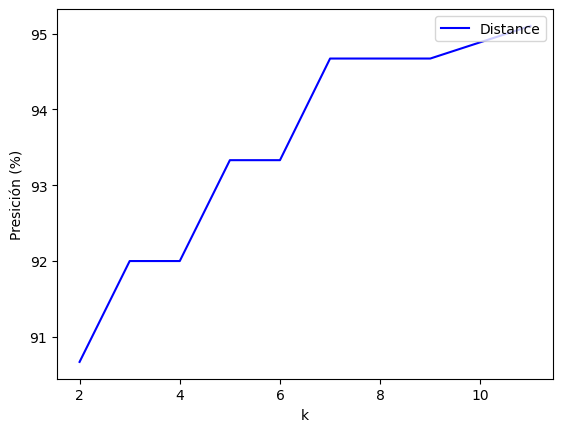

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t=[2,3,4,5,6,7,9,11]
g=[90.67,92.0,92.0,93.33,93.33,94.67,94.67,95.1]
plt.plot(t, g, color="blue", label="Distance")
plt.legend(loc="upper right")
plt.xlabel("k")
plt.ylabel("Presición (%)")
plt.show()

### 2.2. Clasificador de múltiples clase

#### a) Cargue el set datos MNIST (dígitos), utilizando la biblioteca sklearn MNIST. En el listing 1 se muestra cómo hacerlo.

In [4]:
    # Listing 1: Cargar el Set de Datos
    
from sklearn.datasets import load_digits

digits = load_digits (n_class = 10)

#### b) Muestre las primeras 12 imágenes en forma de tabla (3x4). Se debe de observar la imagen del dígito.

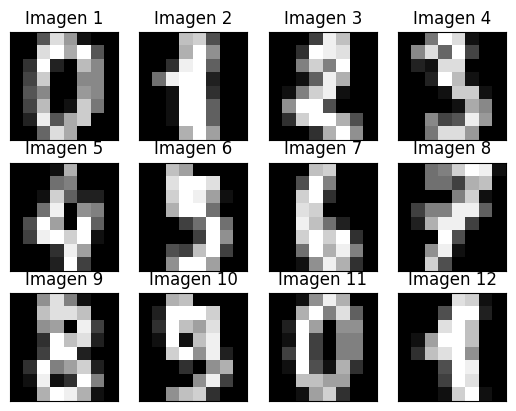

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 4)

plt.gray()

                   
for i in range(12):
    axs.flat[i].imshow(digits.images[i])
    axs.flat[i].set_title(f'Imagen {i+1}')
    axs.flat[i].set_xticks([])
    axs.flat[i].set_yticks([])

plt.show()

#### c) Muestre las dimensiones del set datos (cuántos datos y cuántos features).

In [6]:
shape = digits.data.shape
print("Features: ", shape[1])
print("Data: ", shape[0])

Features:  64
Data:  1797


#### d) Separe el set de datos de tal manera que el 75 % de los datos sea para entrenamiento, mientras que el 25 % sea para el test.

In [7]:
training_amount = round(shape[0] * 0.75)
test_amount = shape[0] - training_amount

training_data = []
test_data = []

if(training_amount + test_amount == shape[0]):
    training_data = digits.data[:training_amount,:]
    training_target = digits.target[:training_amount]
    test_data = digits.data[training_amount:shape[0], :]
    test_target = digits.target[training_amount:shape[0]]
    print("Shape of training data: ", training_data.shape)
    print("Shape of training target: ", training_target.shape)
    print("Shape of test data: ", test_data.shape)
    print("Shape of test data: ", test_target.shape)

Shape of training data:  (1348, 64)
Shape of training target:  (1348,)
Shape of test data:  (449, 64)
Shape of test data:  (449,)


#### e) Instancie su propia implementación de KNN y pruebe el clasificador (k=2,3,5,7,8,10,11) con el set datos solicitados (note que son 10 clases). Muestre la precisión con el método normal y con el método de distancia implementado por cada grupo.


In [8]:
import pandas as pd

test_values_k = [2,3,5,7,8,10,11]
accurancy_our = []

our_classifier = None

for k in test_values_k:
    our_classifier = KNearestNeighbors(training_data, training_target, n_neighbors=k, n_classes=10)
    our_accuracy_u, y_pred_u, y_test_u = our_classifier.score(test_data, test_target, weights='uniform')
    our_accuracy_d, y_pred_d, y_test_d = our_classifier.score(test_data, test_target, weights='distance')
    accurancy_our.append([k, our_accuracy_u, our_accuracy_d])
    
columns = ['K', 'Uniform', 'Distance']

df = pd.DataFrame(accurancy_our, columns=columns)
print(df.to_string(index=False))

 K  Uniform  Distance
 2 0.962138  0.962138
 3 0.971047  0.966592
 5 0.964365  0.962138
 7 0.955457  0.957684
 8 0.955457  0.955457
10 0.955457  0.957684
11 0.957684  0.957684


#### f) Instancie el clasificador de sklearn y realice las mismas pruebas que el punto anterior.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

test_values_k = [2,3,5,7,8,10,11]
accurancy_sklearn = []

for k in test_values_k:
    sklearn_classifier_u = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(training_data, training_target)
    sklearn_classifier_d = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(training_data, training_target)
    our_accuracy_u = sklearn_classifier_u.score(test_data, test_target)
    our_accuracy_d = sklearn_classifier_d.score(test_data, test_target)
    accurancy_sklearn.append([k, our_accuracy_u, our_accuracy_d])
    
columns = ['K', 'Uniform', 'Distance']

df = pd.DataFrame(accurancy_sklearn, columns=columns)
print(df.to_string(index=False))

 K  Uniform  Distance
 2 0.962138  0.962138
 3 0.971047  0.966592
 5 0.964365  0.962138
 7 0.955457  0.957684
 8 0.955457  0.955457
10 0.955457  0.957684
11 0.957684  0.957684


#### g) Compare en una tabla la implementación propia del knn con el de la biblioteca sklearn

Se puede apreciar en el punto e) y en el punto f) como ambas tablas son exactamente iguales. Por lo tanto, la implementación propia y la implementación del sklearn son exactamente iguales

#### h) Realice 5 imágenes con dígitos escrito a mano. Saque una foto a cada dígito y transforme la imagen a las mismas dimensiones que el set de datos. Pruebe su modelo prediciendo cada una de las fotos tomadas. Reporte la clasificación que brinda el modelo mostrando el la imagen original y la clasificación obtenida.

In [10]:
from PIL import Image
from PIL import ImageOps
import numpy as np

# Open the image file
number_9 = Image.open("numero_9.jpeg")
# Invert colors, black background and white number
number_9 = ImageOps.invert(number_9)
# Convert the image in gray scale
number_9 = number_9.convert('L')
# Resize the image in 8x8 pixels
number_9 = number_9.resize((8,8))
# Save the image
number_9.save("number_9_converted.jpeg")
print(np.array(number_9))

[[ 0  0  1 15 10  0  0  0]
 [ 0  0 11  7 19  0  0  0]
 [ 0  0 13  8 23  0  0  0]
 [ 0  0  4 13 15  0  0  0]
 [ 0  0  0  0 12  0  0  0]
 [ 0  0  0  1 13  0  0  0]
 [ 0  0  0  2 11  0  0  0]
 [ 0  0  0  0  1  0  0  0]]


occurancy:  0.625
y_pred:  [2 7 9 1 5 4 7 8 1 2 9 0 0 2 2 7]
y_test:  [1 2 3 4 5 6 7 8 9 2 9 0 0 2 2 7]


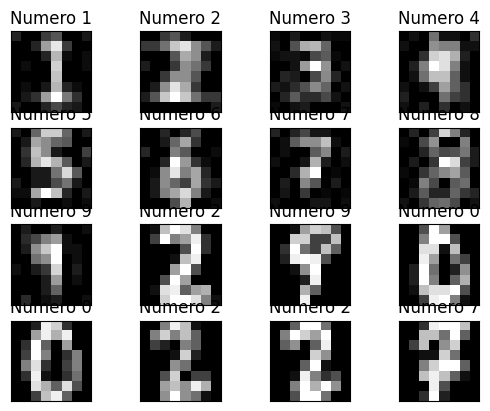

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

numbers_test = [1, 2, 3, 4, 5, 6, 7, 8, 9]
images_test = []

fig, axs = plt.subplots(4, 4)
plt.gray()

j = 0
for i in numbers_test:
    image = Image.open(f'number{i}.jpeg')
    image = np.array(image)
    axs.flat[j].imshow(image)
    axs.flat[j].set_title(f'Numero {i}')
    axs.flat[j].set_xticks([])
    axs.flat[j].set_yticks([])
    j += 1
    image = image.flatten()
    images_test.append(image)

    
for i in range(7):
    rand_number = random.randint(0, len(digits.data))
    image_set = digits.data[rand_number]
    target_set = digits.target[rand_number]
    images_test.append(image_set)
    numbers_test.append(target_set)
    axs.flat[j].imshow(digits.images[rand_number])
    axs.flat[j].set_title(f'Numero {target_set}')
    axs.flat[j].set_xticks([])
    axs.flat[j].set_yticks([])
    j += 1
    
images_test = np.array(images_test)
numbers_test = np.array(numbers_test)

#predict = our_classifier.predict(images)


our_accuracy_u_test, y_pred_u_test, y_test_u_test = our_classifier.score(images_test, numbers_test, weights='uniform')
print("occurancy: ", our_accuracy_u_test)
print("y_pred: ", y_pred_u_test)
print("y_test: ", y_test_u_test)

plt.show()